### 5420_Assingment2_Yimin Wang_yw3454

## part a: Paper reading

I have 3 key takeaways after reading the paper 'Determinants of Default in P2P lending'. First, I gained industry knowledge about P2P lending, which has 2 pros: lower intermediation costs and solutions to credit rationing. Meanwhile, information asymmetry is the fundamental problem of P2P lending. To solve this problem, P2P lending sites are trying to make the lending process transparent by offering information on loan quality. Secondly, the hypotheses in this paper offer me a reference for feature selection. It analyzes default risks from 4 dimensions: loan characteristics, borrower characteristics, credit history, and personal indebtedness. In my EDA, I analyzed loan characteristics and personal indebtedness. Last but not least, one model in this paper shows a problem of underfitting, which can be explained by the economies of learning and change of the macroeconomic environment. Analysis of the underfitting problem shows how detailed as well as comprehensive analysis should be. This is what I am trying to achieve through this course.

## part b: Analysis

### Load Data

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

In [112]:
data = pd.read_csv("XYZloan_default_selected_vars.csv")

### Glimpse the Data

In [113]:
data.head(3)

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 89 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    80000 non-null  int64  
 1   Unnamed: 0.1  80000 non-null  int64  
 2   id            80000 non-null  int64  
 3   loan_default  80000 non-null  int64  
 4   AP001         80000 non-null  int64  
 5   AP002         80000 non-null  int64  
 6   AP003         80000 non-null  int64  
 7   AP004         80000 non-null  int64  
 8   AP005         80000 non-null  object 
 9   AP006         80000 non-null  object 
 10  AP007         80000 non-null  int64  
 11  AP008         80000 non-null  int64  
 12  AP009         80000 non-null  int64  
 13  TD001         80000 non-null  int64  
 14  TD002         80000 non-null  int64  
 15  TD005         80000 non-null  int64  
 16  TD006         80000 non-null  int64  
 17  TD009         80000 non-null  int64  
 18  TD010         80000 non-nu

In [115]:
data['loan_default'].value_counts()

0    64512
1    15488
Name: loan_default, dtype: int64

### Clean Data

drop columns with high proportion of missing values ('TD044','TD048','TD051','TD054','TD055','TD061','TD062'), columns which are not in the Variable Dictionary and cannot be interpreted ('TD022','TD023','TD024','TD025','TD026','TD027','TD028','TD029','Unnamed: 0', 'Unnamed: 0.1','id'), non-numeric variables ('AP005','AP006','MB007')

In [116]:
data = data.drop(['TD044','TD048','TD051','TD054','TD055','TD061','TD062',
                  'TD022','TD023','TD024','TD025','TD026','TD027','TD028',
                  'TD029','AP005','AP006','MB007','Unnamed: 0', 'Unnamed: 0.1', 'id'],axis =1)

In [117]:
data.columns

Index(['loan_default', 'AP001', 'AP002', 'AP003', 'AP004', 'AP007', 'AP008',
       'AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013',
       'TD014', 'TD015', 'CR004', 'CR005', 'CR009', 'CR012', 'CR015', 'CR017',
       'CR018', 'CR019', 'PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031',
       'CD008', 'CD018', 'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106',
       'CD107', 'CD108', 'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120',
       'CD121', 'CD123', 'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136',
       'CD137', 'CD152', 'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167',
       'CD169', 'CD170', 'CD172', 'CD173', 'MB005'],
      dtype='object')

In [118]:
features = ['AP001', 'AP002', 'AP003', 'AP004', 'AP007', 'AP008','AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013',
       'TD014', 'TD015', 'CR004', 'CR005', 'CR009', 'CR012', 'CR015', 'CR017','CR018', 'CR019', 'PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031',
       'CD008', 'CD018', 'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106','CD107', 'CD108', 'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120',
       'CD121', 'CD123', 'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136','CD137', 'CD152', 'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167',
       'CD169', 'CD170', 'CD172', 'CD173', 'MB005']

<AxesSubplot:>

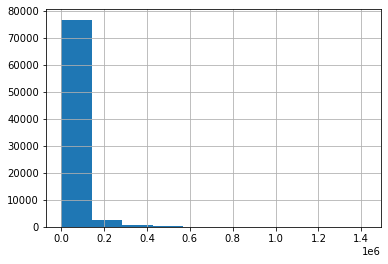

In [119]:
data['CR009'].hist()

In [120]:
# Convert the "-99" or "-999" to NA, then treat them as NAs
def converting(var):
    data[var].loc[data[var]<0] = float (
    'NaN')

for i in features:
    converting(i)

/opt/anaconda3/envs/New/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/New/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/New/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

/opt/anaconda3/envs/New/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/New/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/New/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

#### Create categorical variables using qcut

In [121]:
def binning(var):
    data[var + '_bin'] = pd.qcut(data[var],10,duplicates='drop').values.add_categories("NoData")
    data[var + '_bin'] = data[var + '_bin'].fillna("NoData").astype(str)
    data[var + '_bin'].value_counts(dropna=False)
    

for i in features:
    binning(i)

In [122]:
data['CR009_bin'].value_counts(dropna=False)

(-0.001, 2500.0]        16337
(34000.0, 50000.0]       8189
(24295.8, 34000.0]       8107
(6798.7, 11499.0]        8006
(82200.2, 1420300.0]     8000
(17285.0, 24295.8]       8000
(11499.0, 17285.0]       7994
(50000.0, 82200.2]       7704
(2500.0, 6798.7]         7663
Name: CR009_bin, dtype: int64

### EDA

#### Loan Size: CR009_bin

I first took a look at the distribution of variable: CR009_bin, loan total amount. We can conclude that samll amount loans with total value less than 2500 account for more than 20% of all loans and this variable is predictive because of the different response rates.

In addition, from this week's reading, loan purpose is one of the critical determinants of default. Among all purposes, 'samll business' is most risky. Thus, for future loan risk management, lenders should investigate borrowers' loan purpose carefully in their decision making. 

In [123]:
z = data.groupby('CR009_bin')['loan_default'].agg(['count','mean']).reset_index()
z

,CR009_bin,count,mean
0,"(-0.001, 2500.0]",16337,0.180694
1,"(11499.0, 17285.0]",7994,0.207030
2,"(17285.0, 24295.8]",8000,0.204750
3,"(24295.8, 34000.0]",8107,0.209695
4,"(2500.0, 6798.7]",7663,0.208535
5,"(34000.0, 50000.0]",8189,0.197216
6,"(50000.0, 82200.2]",7704,0.176791
7,"(6798.7, 11499.0]",8006,0.206220
8,"(82200.2, 1420300.0]",8000,0.164625


In [124]:
z['count_pcnt'] = z['count']/z['count'].sum()
z

,CR009_bin,count,mean,count_pcnt
0,"(-0.001, 2500.0]",16337,0.180694,0.204212
1,"(11499.0, 17285.0]",7994,0.207030,0.099925
2,"(17285.0, 24295.8]",8000,0.204750,0.100000
3,"(24295.8, 34000.0]",8107,0.209695,0.101337
4,"(2500.0, 6798.7]",7663,0.208535,0.095787
5,"(34000.0, 50000.0]",8189,0.197216,0.102362
6,"(50000.0, 82200.2]",7704,0.176791,0.096300
7,"(6798.7, 11499.0]",8006,0.206220,0.100075
8,"(82200.2, 1420300.0]",8000,0.164625,0.100000


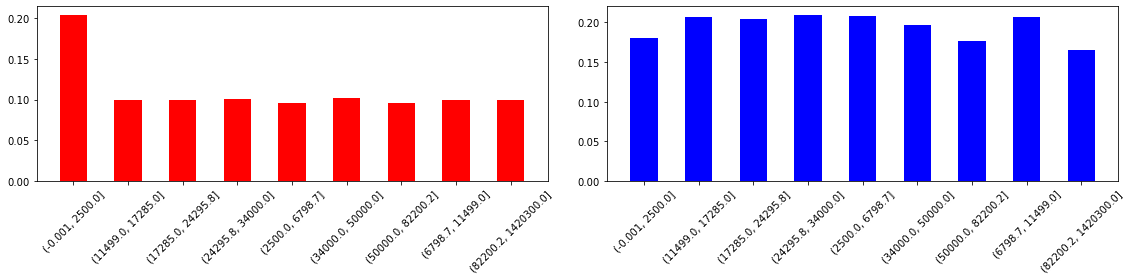

In [125]:
# Visualize the distribution
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

z= data.groupby('CR009_bin')['loan_default'].agg(['count','mean']).reset_index() 
z['count_pcnt'] = z['count']/z['count'].sum()
x = z['CR009_bin']
y_mean = z['mean']
count_pcnt = z['count_pcnt']
ind = np.arange(0, len(x))
width = .5

fig = plt.figure(figsize=(16,4))
plt.subplot(121)
plt.bar(ind, count_pcnt, width, color='r')
plt.xticks(ind,x.tolist(), rotation=45)

plt.subplot(122)
plt.bar(ind, y_mean, width, color='b')
plt.xticks(ind,x.tolist(), rotation=45)
plt.tight_layout()
plt.show()

#### Loan Term: AP004_bin

Another loan characteristic is loan term (variable AP004). From the graphs we can see that loans with long term (9 - 12) account for nearly 88% of total and this variable is also predictive.

In [126]:
data['AP004_bin'].value_counts(dropna=False)

(9.0, 12.0]     70357
(2.999, 9.0]     9643
Name: AP004_bin, dtype: int64

In [127]:
z = data.groupby('AP004_bin')['loan_default'].agg(['count','mean']).reset_index()
z

,AP004_bin,count,mean
0,"(2.999, 9.0]",9643,0.098206
1,"(9.0, 12.0]",70357,0.206675


In [128]:
z['count_pcnt'] = z['count']/z['count'].sum()
z

,AP004_bin,count,mean,count_pcnt
0,"(2.999, 9.0]",9643,0.098206,0.120538
1,"(9.0, 12.0]",70357,0.206675,0.879463


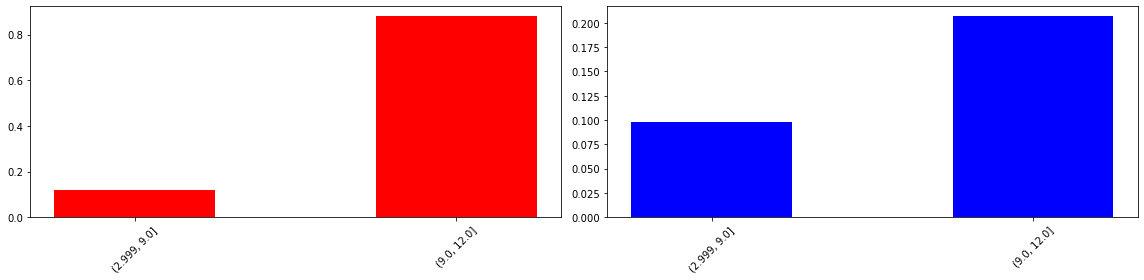

In [129]:
z= data.groupby('AP004_bin')['loan_default'].agg(['count','mean']).reset_index() 
z['count_pcnt'] = z['count']/z['count'].sum()
x = z['AP004_bin']
y_mean = z['mean']
count_pcnt = z['count_pcnt']
ind = np.arange(0, len(x))
width = .5

fig = plt.figure(figsize=(16,4))
plt.subplot(121)
plt.bar(ind, count_pcnt, width, color='r')
plt.xticks(ind,x.tolist(), rotation=45)

plt.subplot(122)
plt.bar(ind, y_mean, width, color='b')
plt.xticks(ind,x.tolist(), rotation=45)
plt.tight_layout()
plt.show()

#### Indebtedness: TD013_bin

Next, I looked at the distibtution of variables whose description has the key word 'P2P'. I selected TD013: TD_CNT_QUERY_LAST_6MON_P2P. Peer-to-peer or P2P lending has a problem of informatin asymmetry, where many risks are hidden. From the graphs, we can see that values below 6 make up more than 50% of all observations and this variable is predictive because of the different response rates.

A loan with high amounts of queries to credit center may happen when the borrower is applying loans from different lenders in the peroid of time so that those lenders are querying about the borrower's credit records. Variables of query amounts are indirect indicators of indebtedness situation.

In [130]:
data['TD013_bin'].value_counts(dropna=False)

(-0.001, 2.0]    15031
(4.0, 6.0]       13823
(2.0, 3.0]        9100
(10.0, 14.0]      9008
(3.0, 4.0]        8423
(8.0, 10.0]       7489
(14.0, 52.0]      6860
(6.0, 7.0]        5601
(7.0, 8.0]        4665
Name: TD013_bin, dtype: int64

In [131]:
z['count_pcnt'] = z['count']/z['count'].sum()
z

,AP004_bin,count,mean,count_pcnt
0,"(2.999, 9.0]",9643,0.098206,0.120538
1,"(9.0, 12.0]",70357,0.206675,0.879463


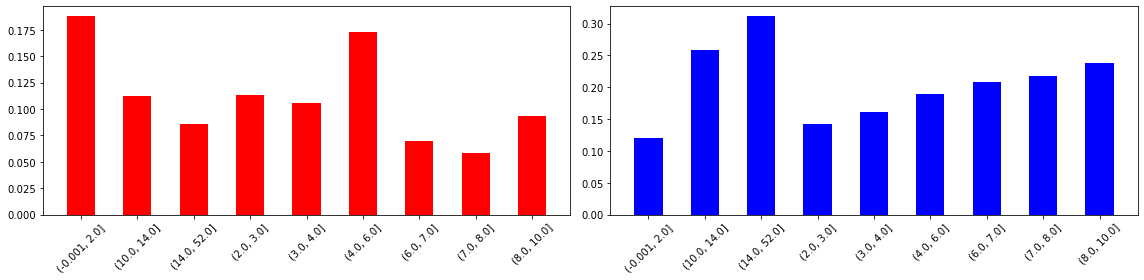

In [132]:
z= data.groupby('TD013_bin')['loan_default'].agg(['count','mean']).reset_index() 
z['count_pcnt'] = z['count']/z['count'].sum()
x = z['TD013_bin']
y_mean = z['mean']
count_pcnt = z['count_pcnt']
ind = np.arange(0, len(x))
width = .5

fig = plt.figure(figsize=(16,4))
plt.subplot(121)
plt.bar(ind, count_pcnt, width, color='r')
plt.xticks(ind,x.tolist(), rotation=45)

plt.subplot(122)
plt.bar(ind, y_mean, width, color='b')
plt.xticks(ind,x.tolist(), rotation=45)
plt.tight_layout()
plt.show()

#### Indebtedness: CR019_bin

Another indicator of indebtedness I chose to explore is CR019_bin: SCORE_SINGLE_DEBIT_CARD_LIMIT. This variable is predictive and indicates information of lender debit card which is related to lenders' ability to make loan repayment.

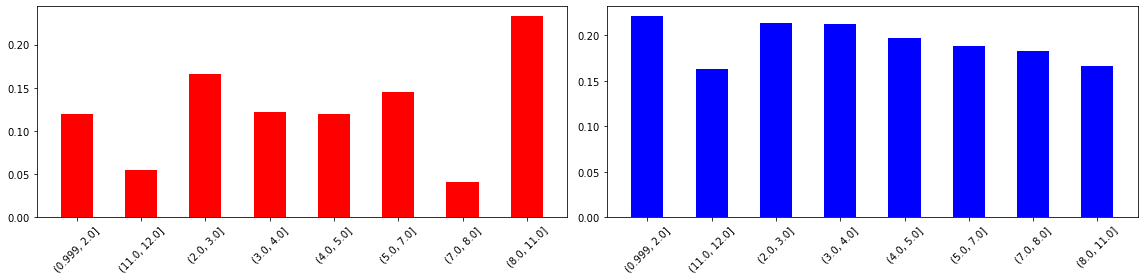

In [133]:
z= data.groupby('CR019_bin')['loan_default'].agg(['count','mean']).reset_index() 
z['count_pcnt'] = z['count']/z['count'].sum()
x = z['CR019_bin']
y_mean = z['mean']
count_pcnt = z['count_pcnt']
ind = np.arange(0, len(x))
width = .5

fig = plt.figure(figsize=(16,4))
plt.subplot(121)
plt.bar(ind, count_pcnt, width, color='r')
plt.xticks(ind,x.tolist(), rotation=45)

plt.subplot(122)
plt.bar(ind, y_mean, width, color='b')
plt.xticks(ind,x.tolist(), rotation=45)
plt.tight_layout()
plt.show()

#### Loop through

In [134]:
features_loop = ['AP001', 'AP002', 'AP003', 'AP007', 'AP008','AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 
       'TD014', 'TD015', 'CR004', 'CR005', 'CR009', 'CR012', 'CR015', 'CR017','CR018', 'PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031',
       'CD008', 'CD018', 'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106','CD107', 'CD108', 'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120',
       'CD121', 'CD123', 'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136','CD137', 'CD152', 'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167',
       'CD169', 'CD170', 'CD172', 'CD173', 'MB005']

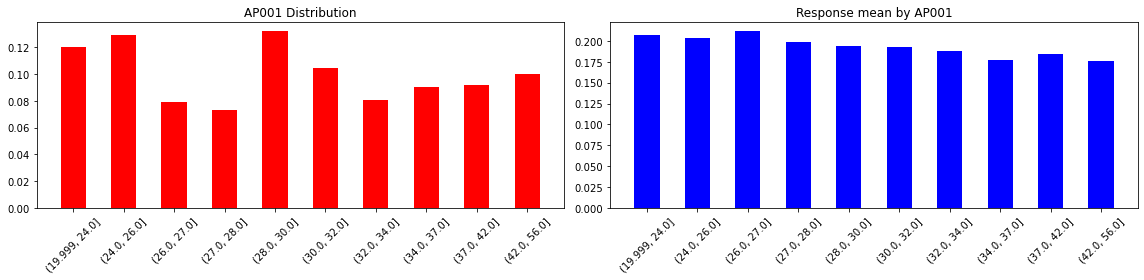

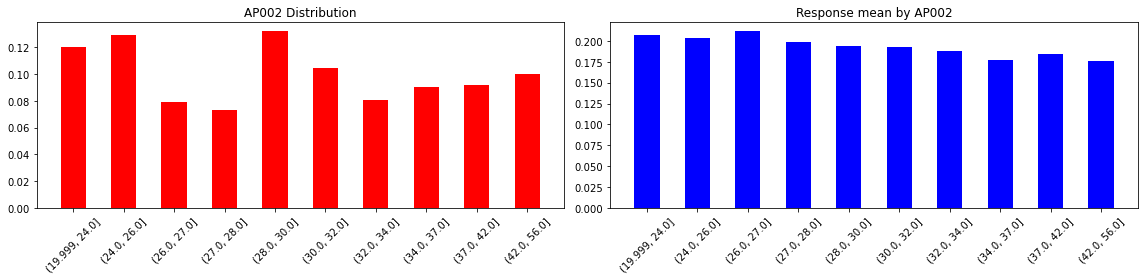

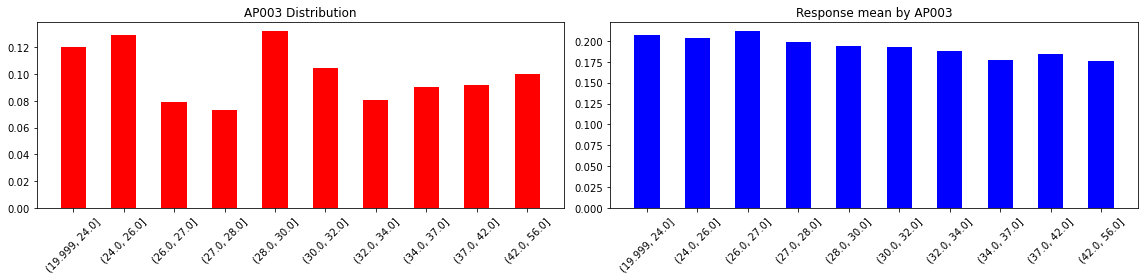

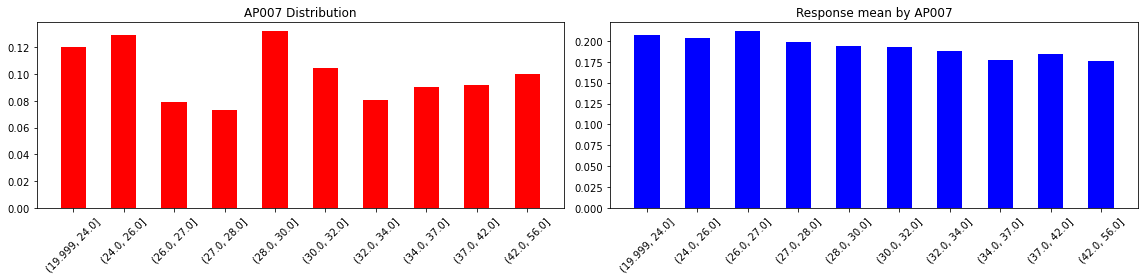

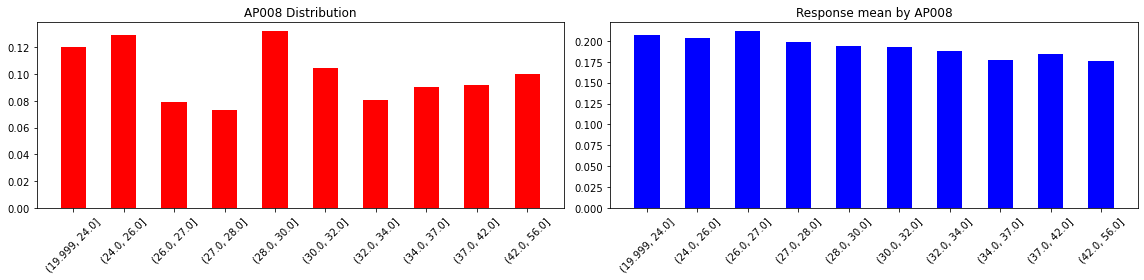

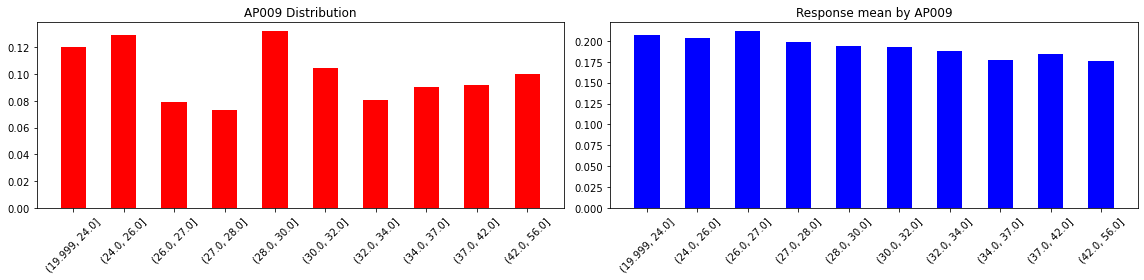

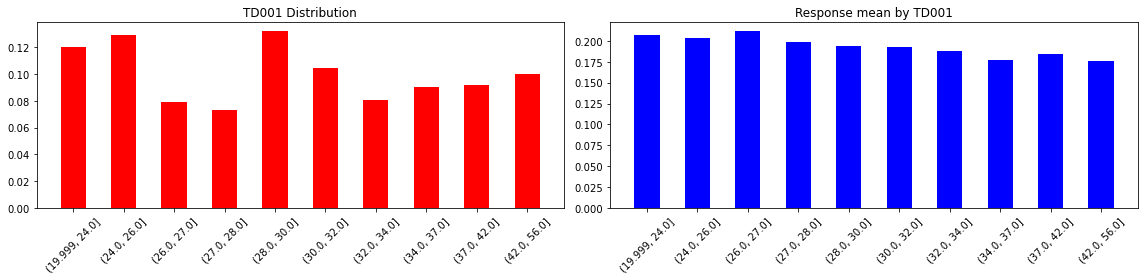

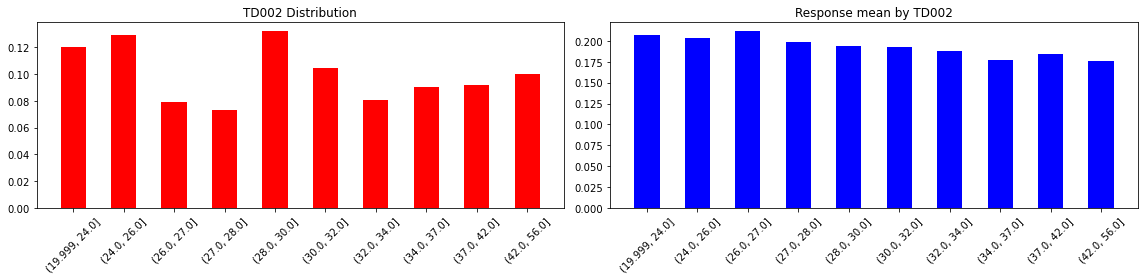

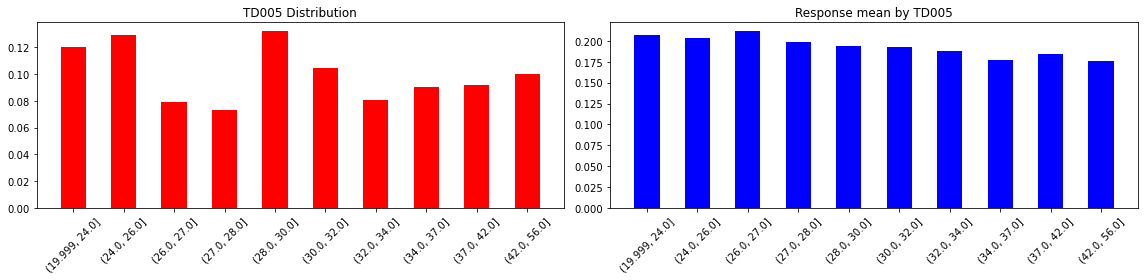

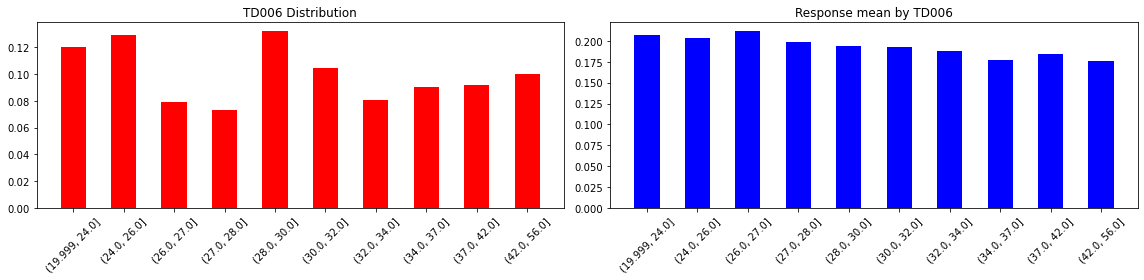

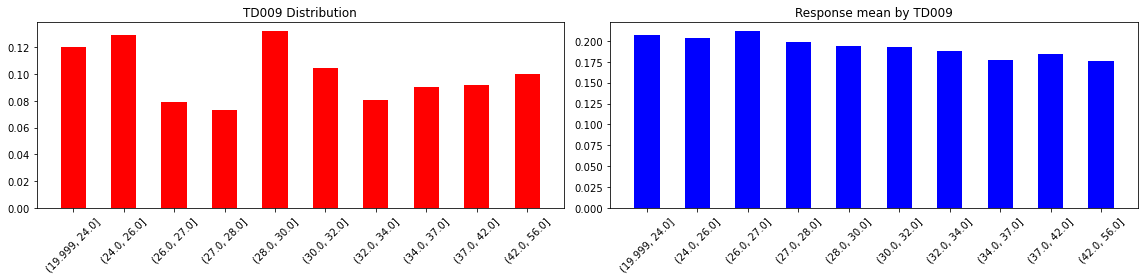

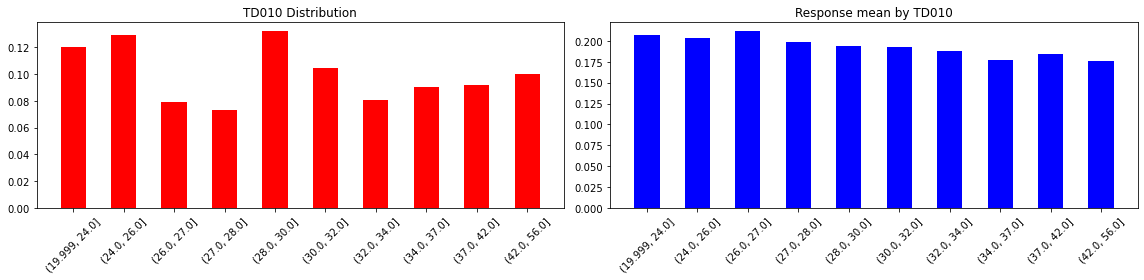

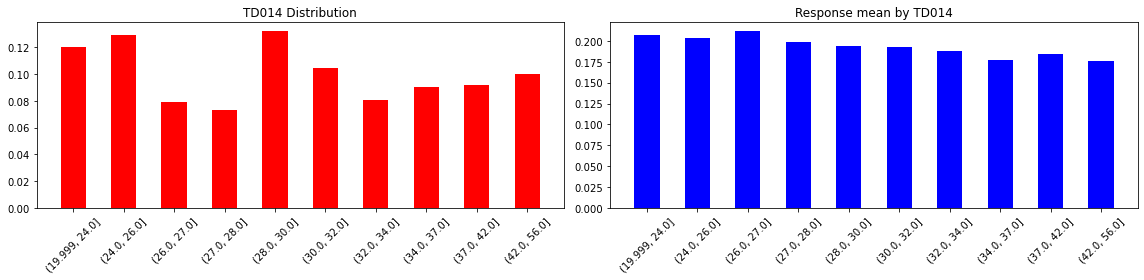

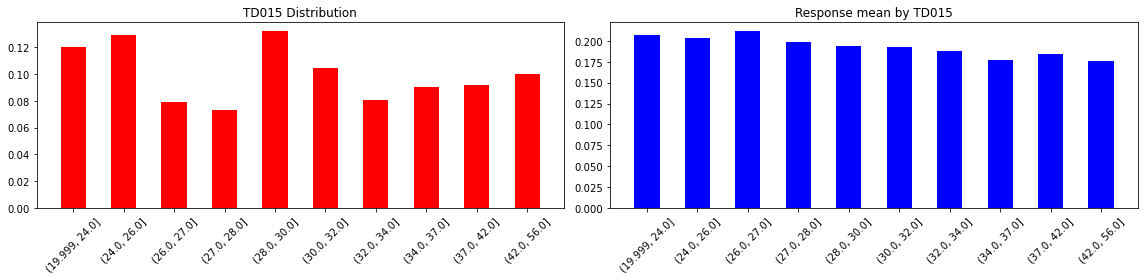

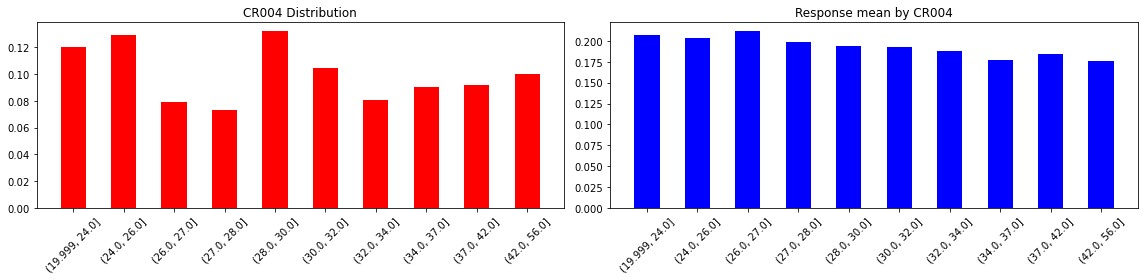

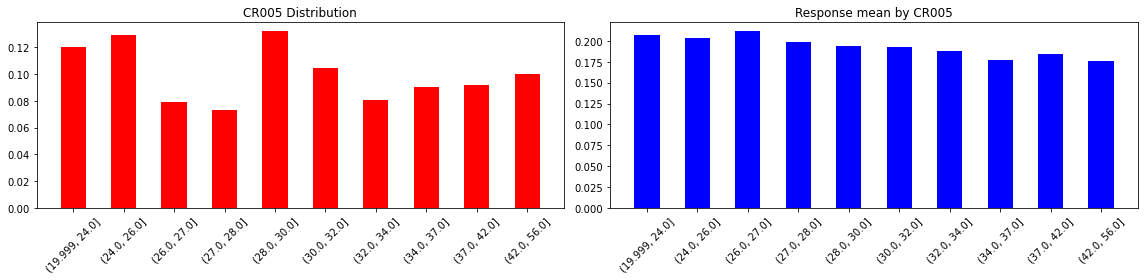

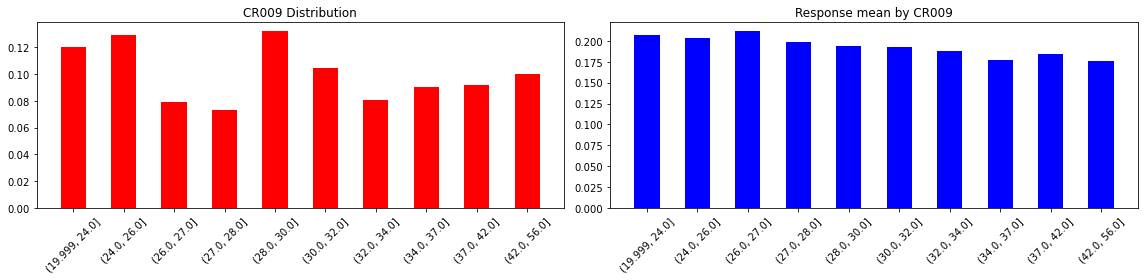

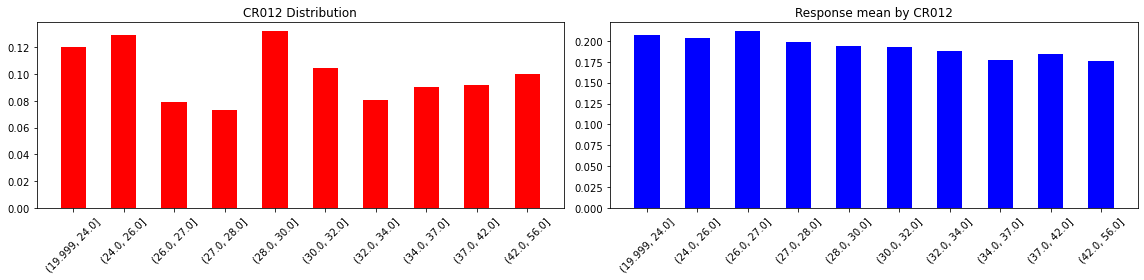

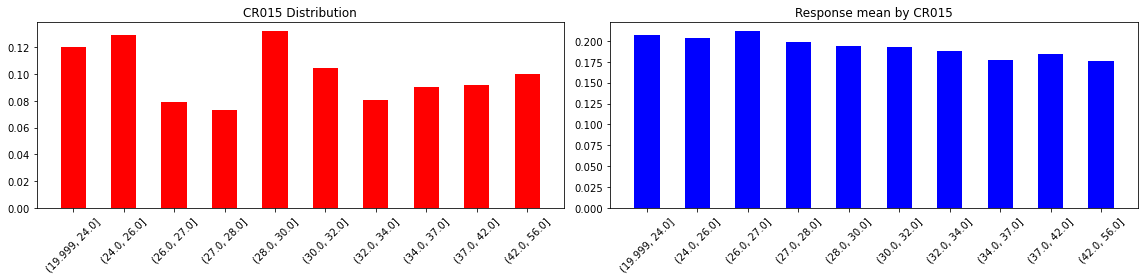

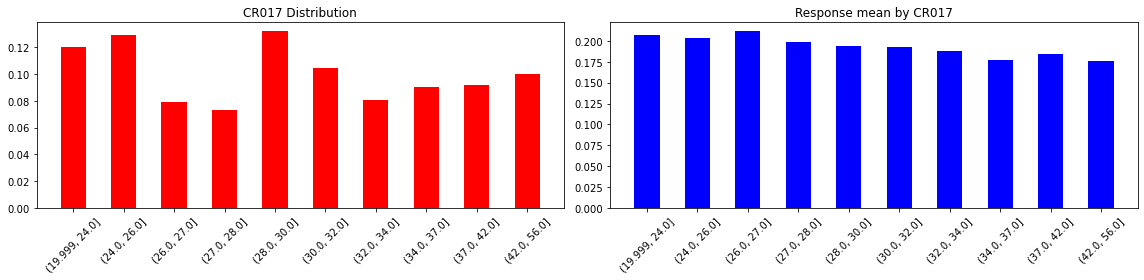

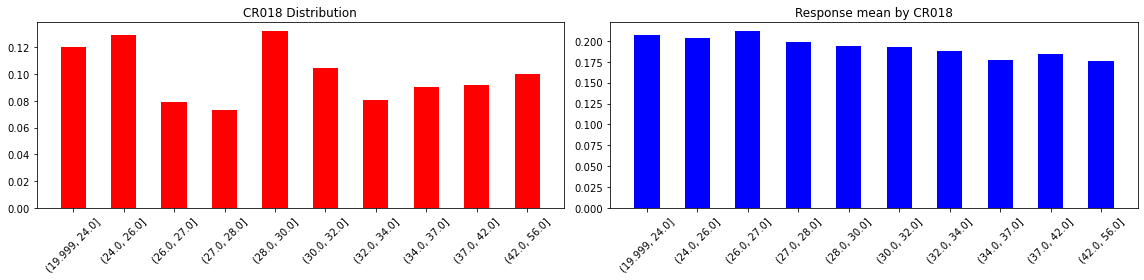

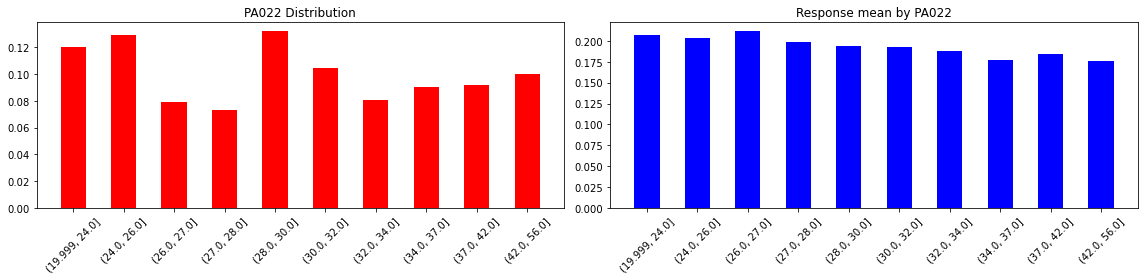

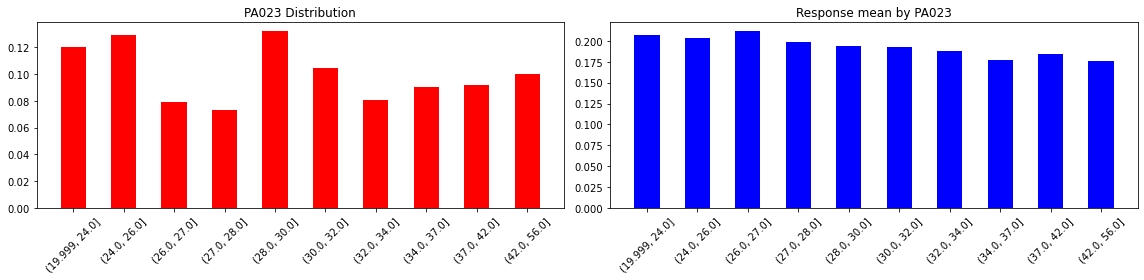

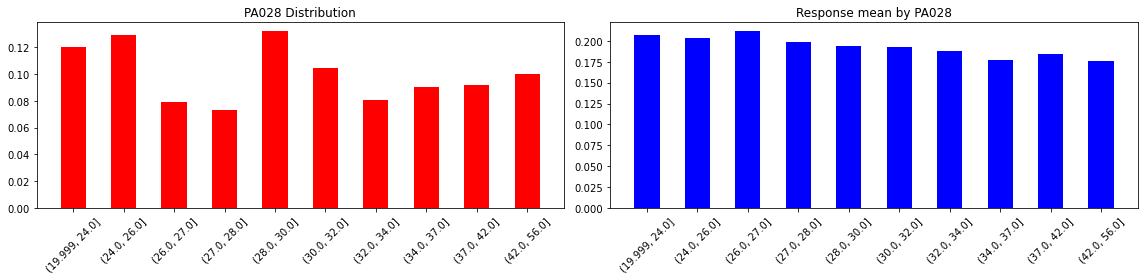

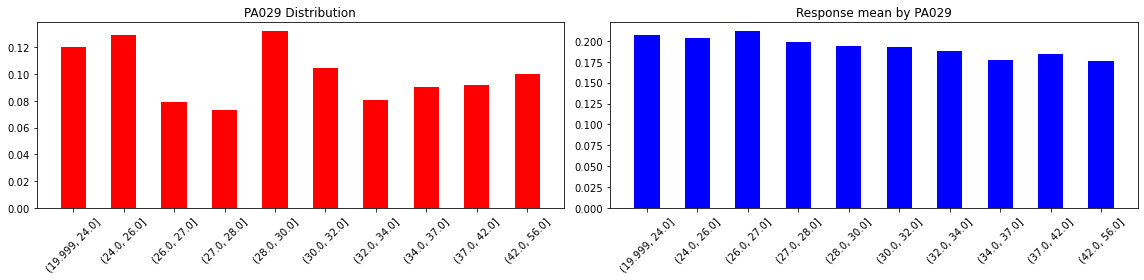

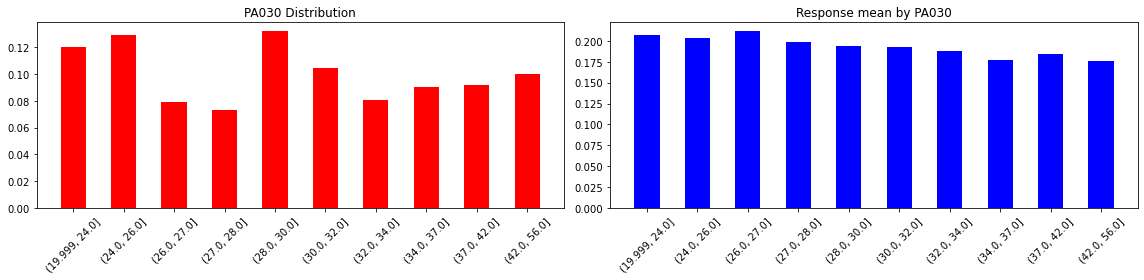

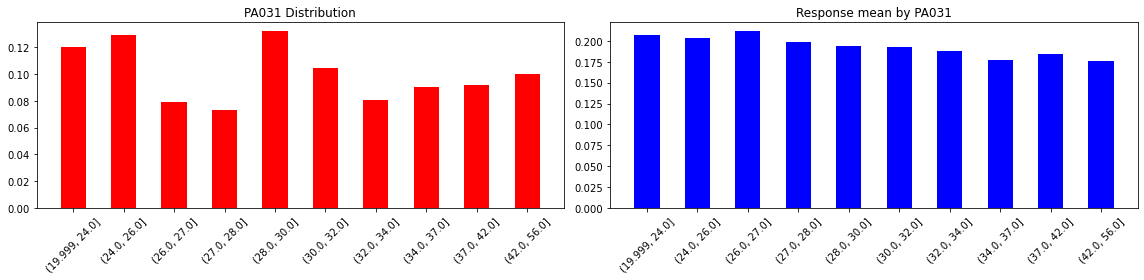

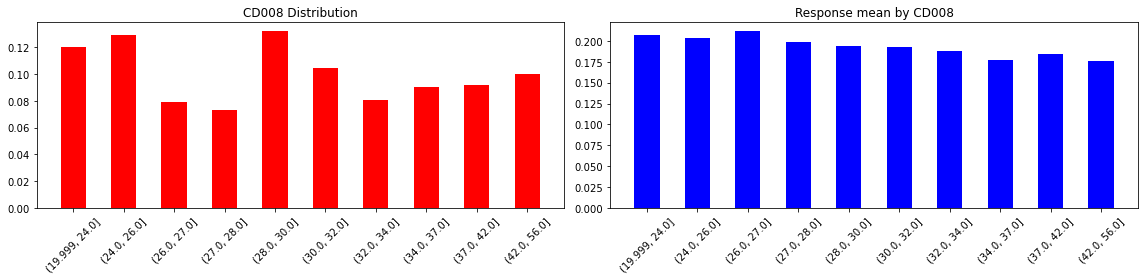

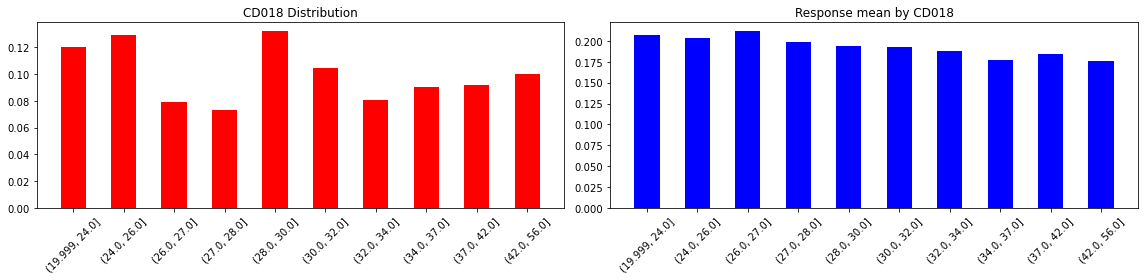

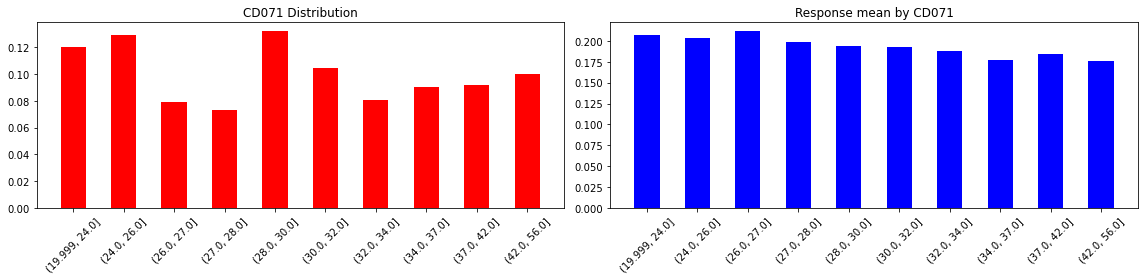

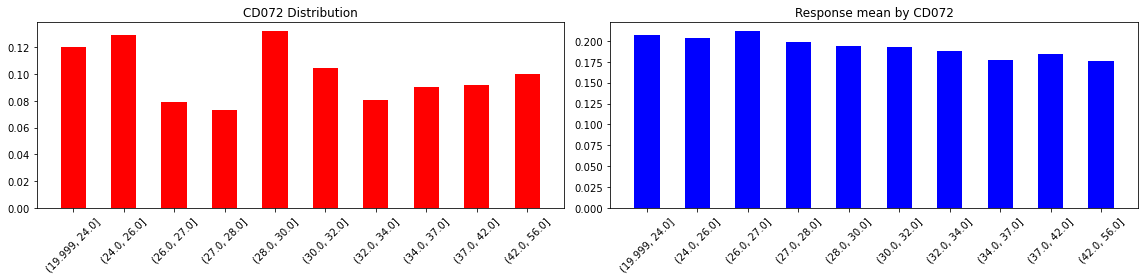

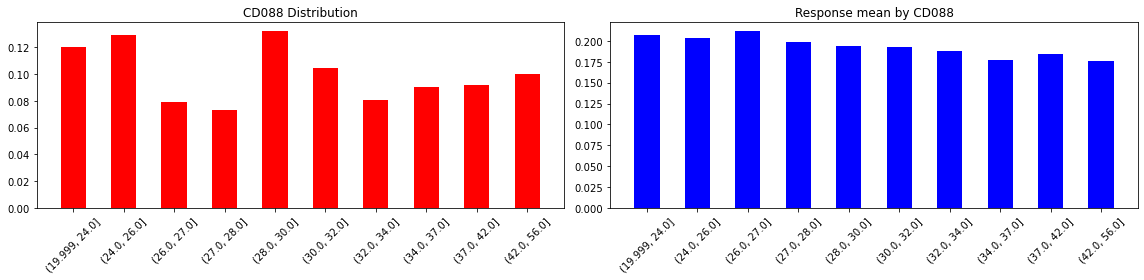

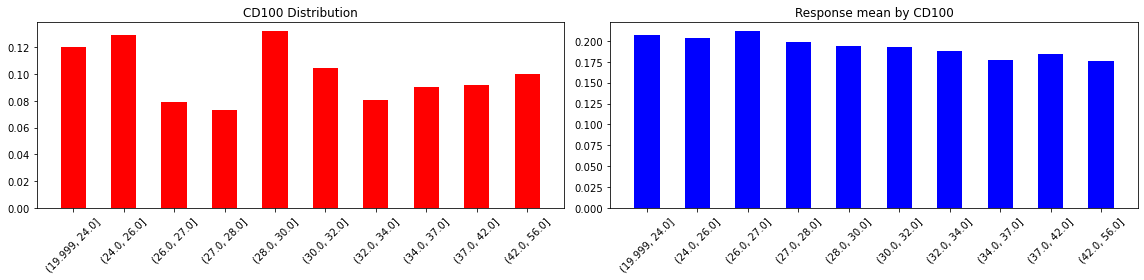

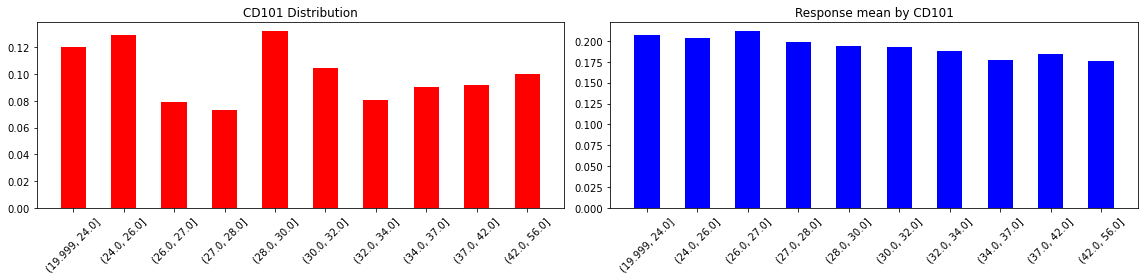

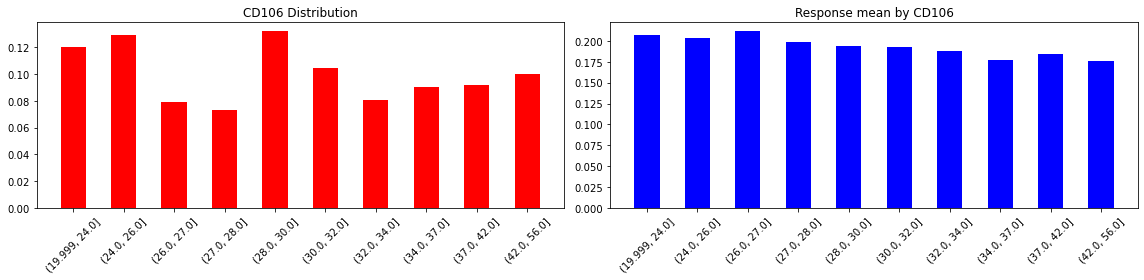

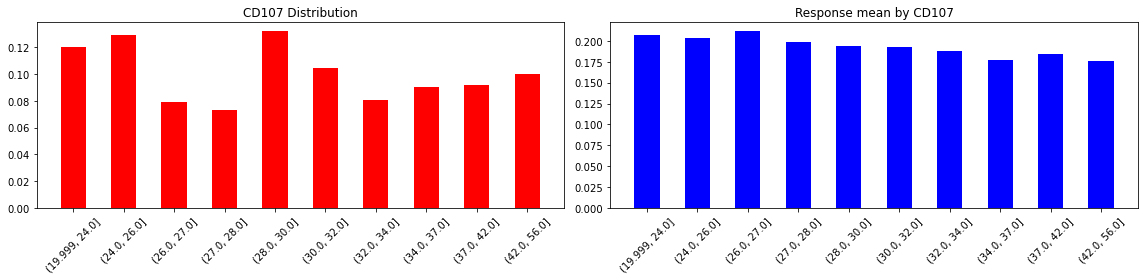

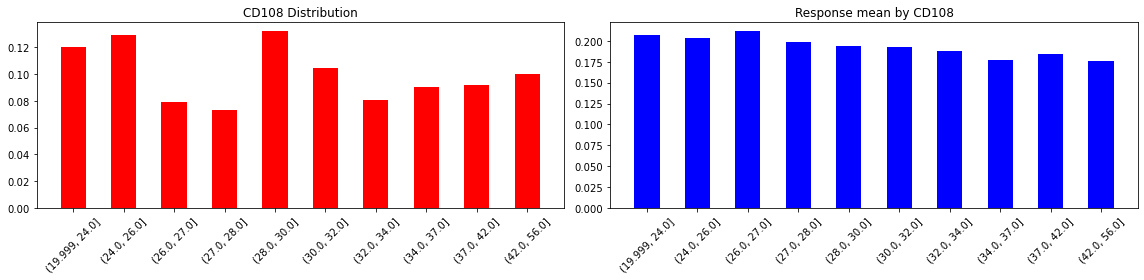

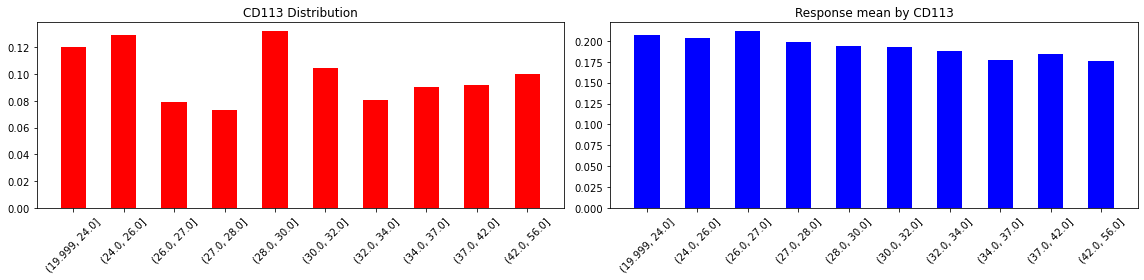

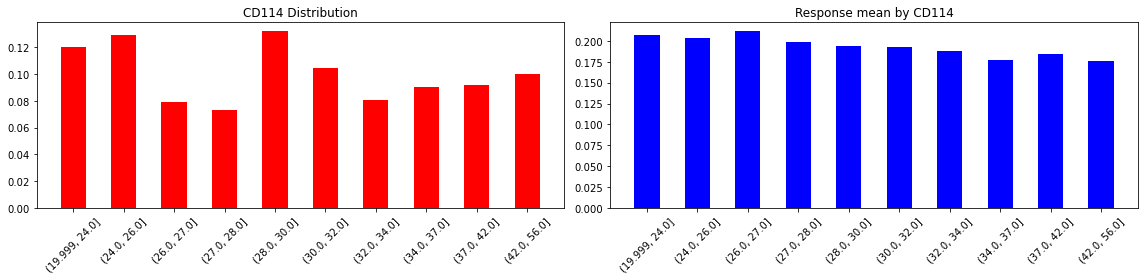

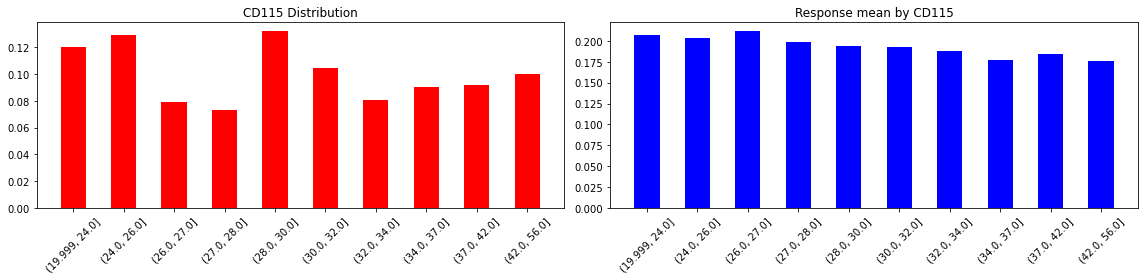

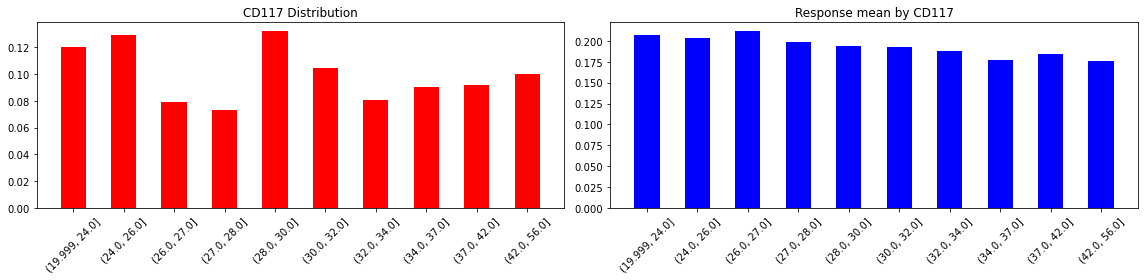

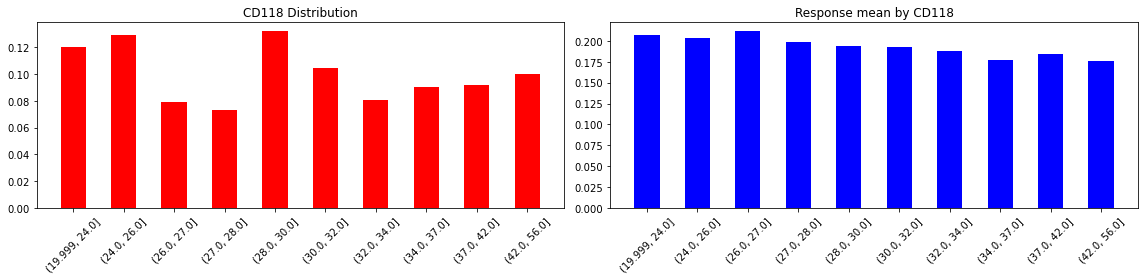

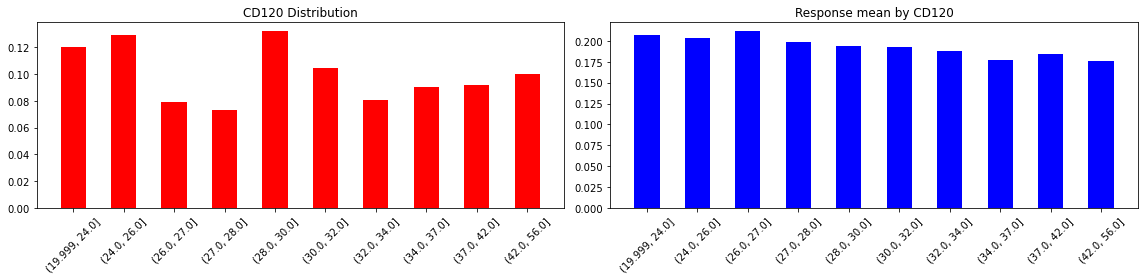

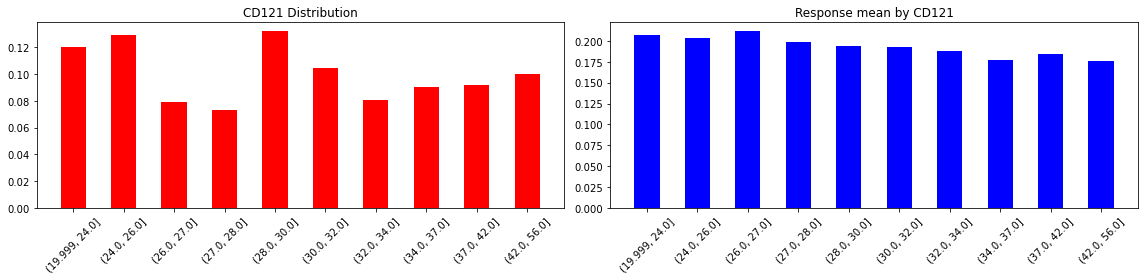

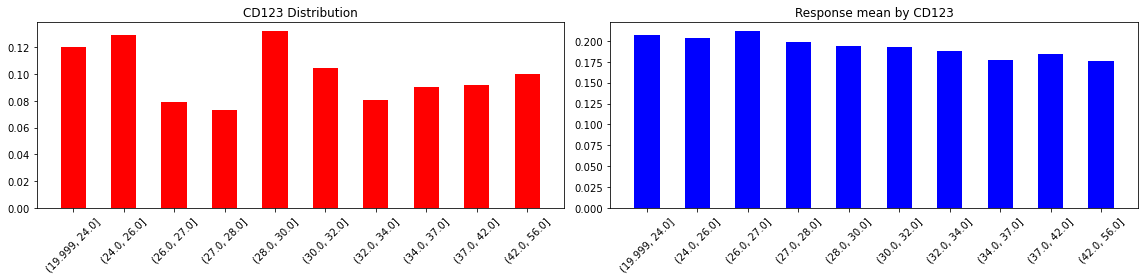

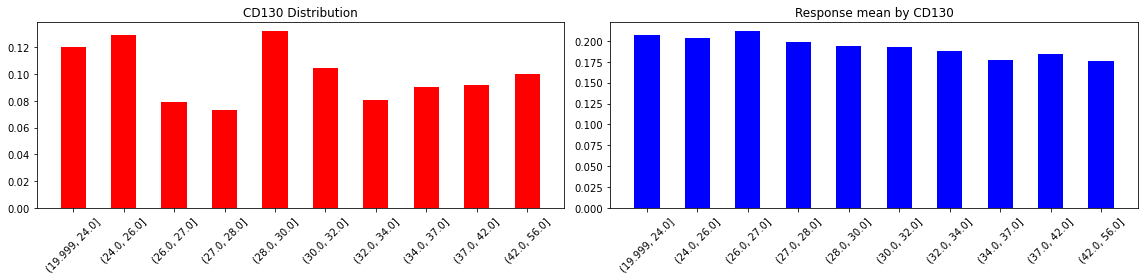

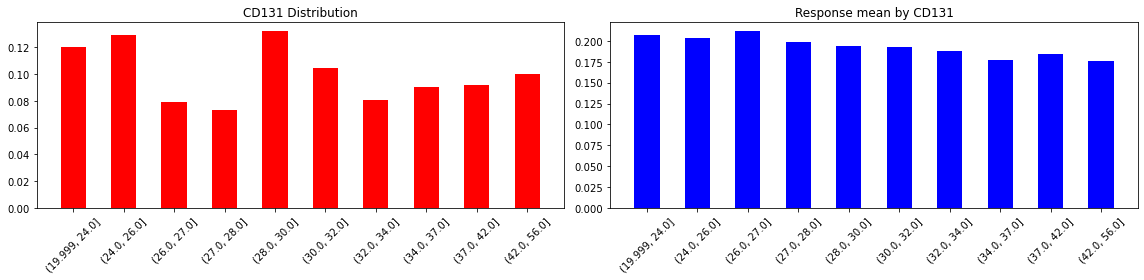

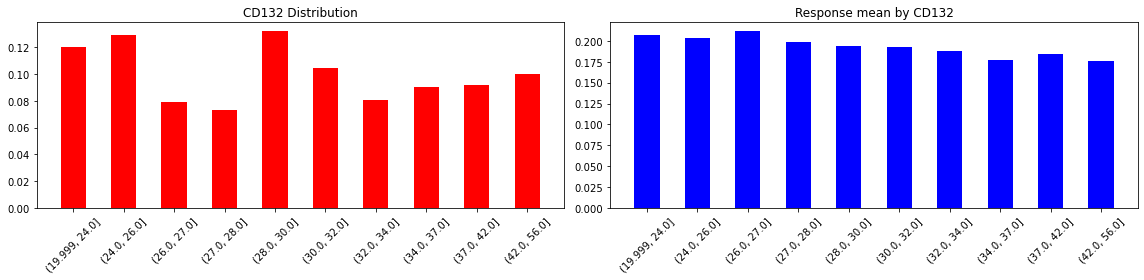

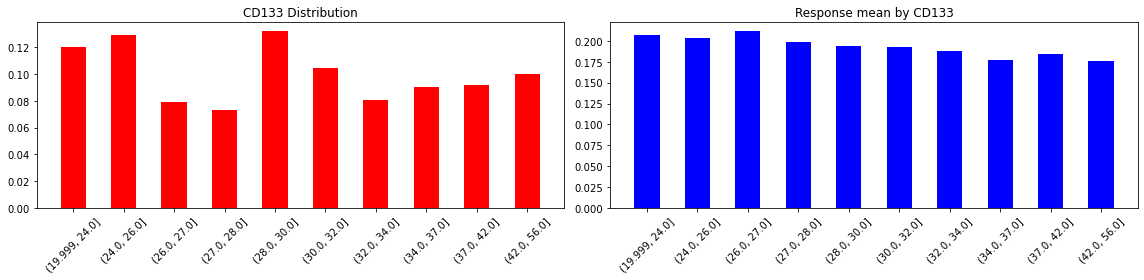

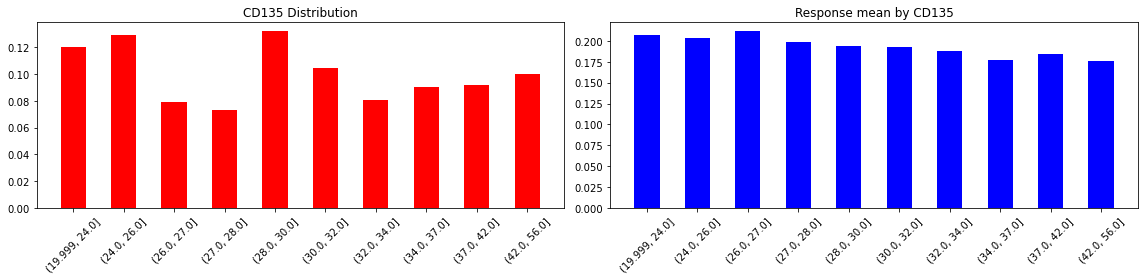

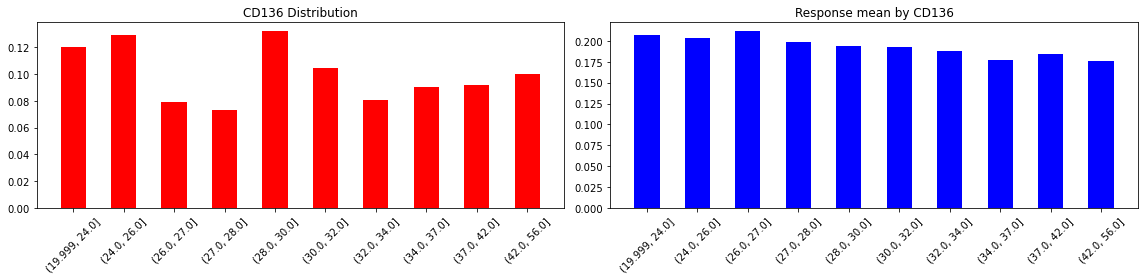

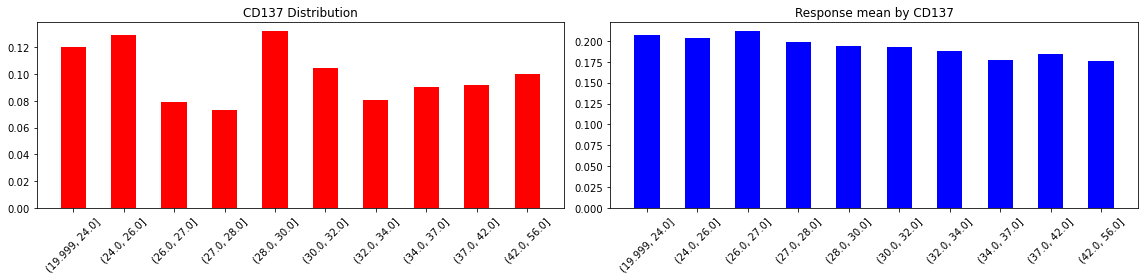

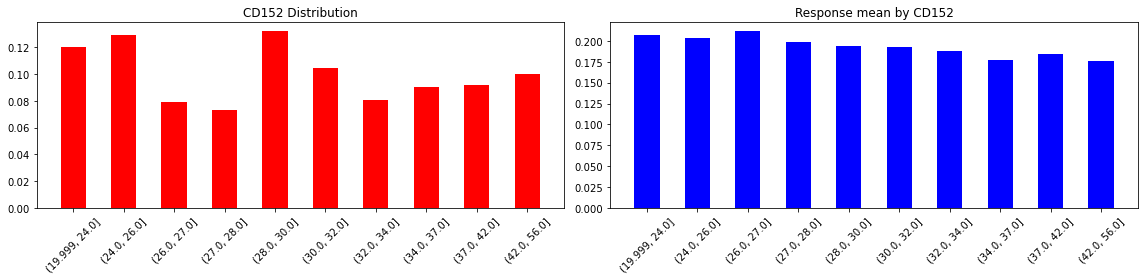

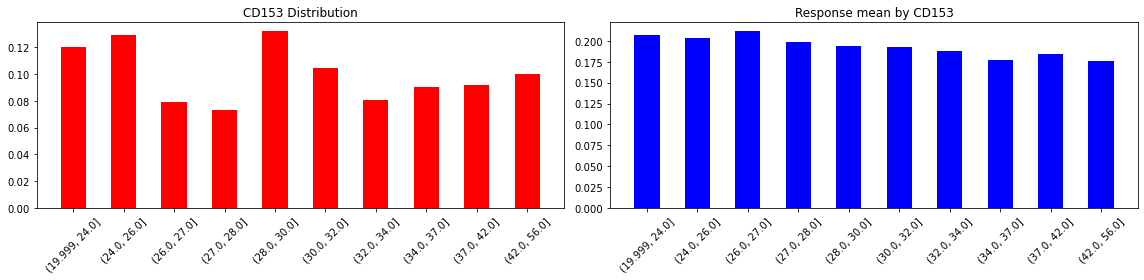

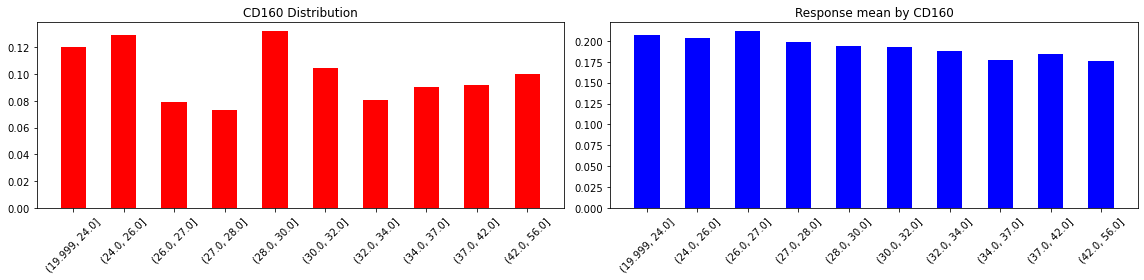

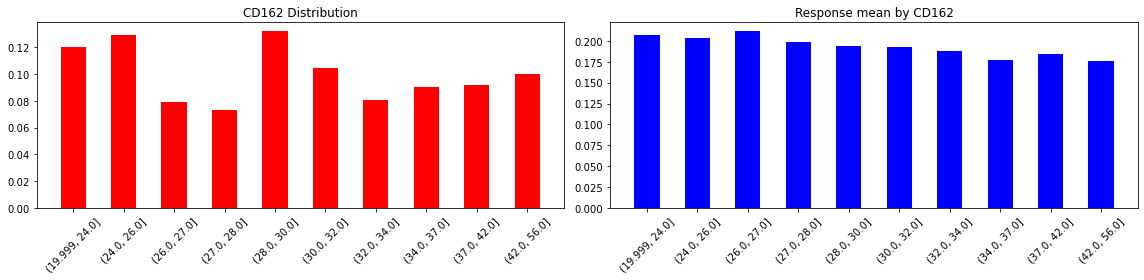

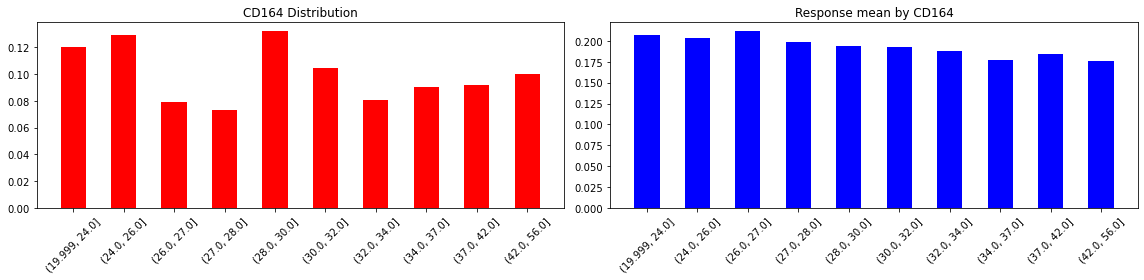

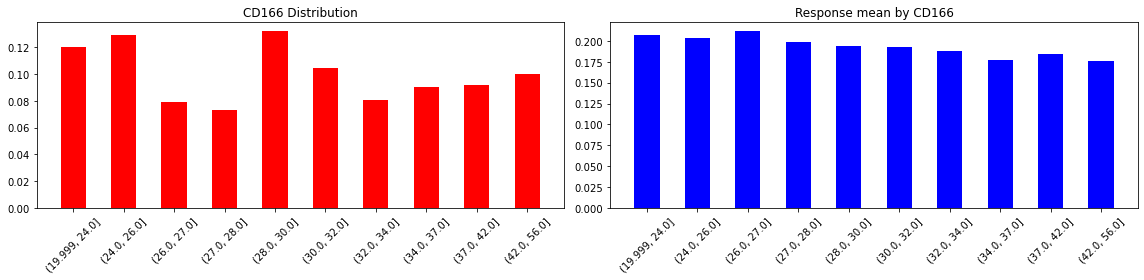

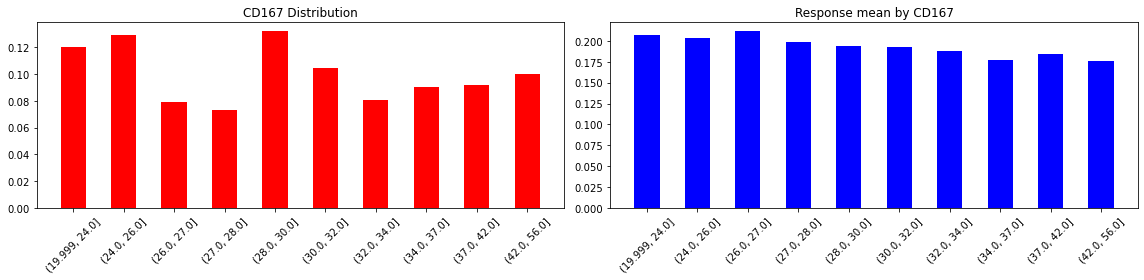

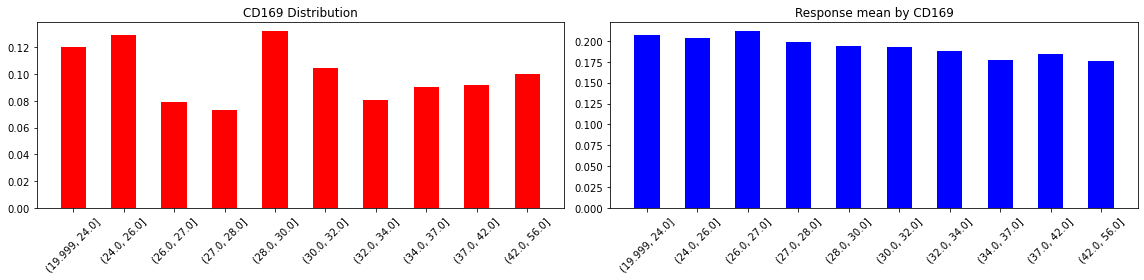

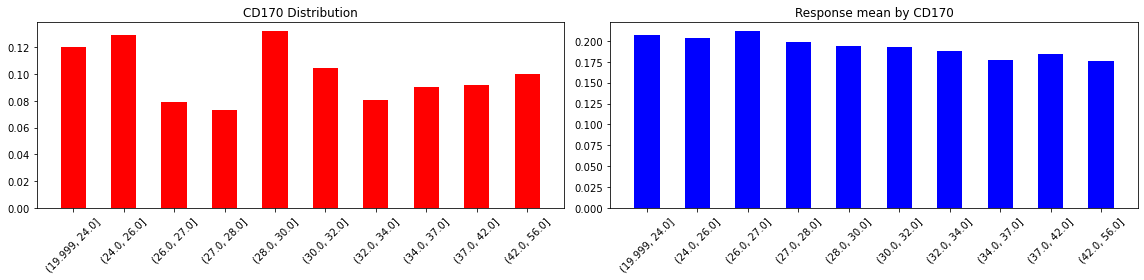

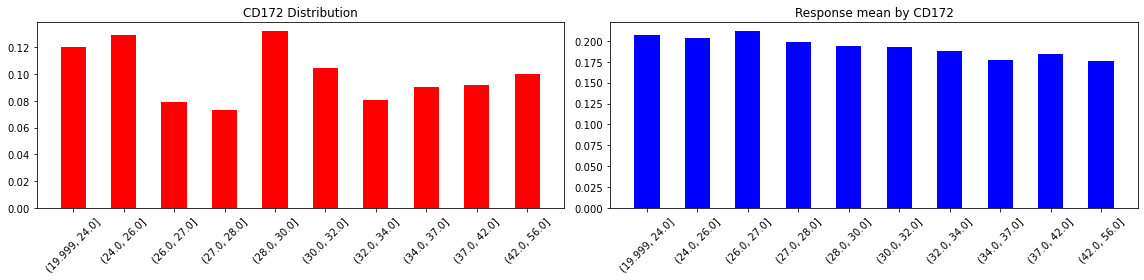

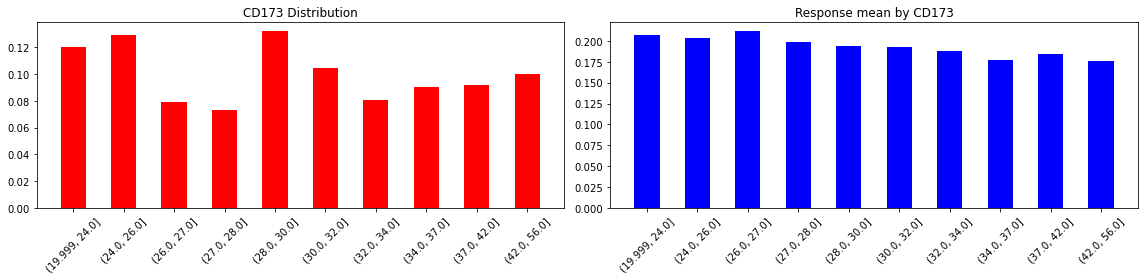

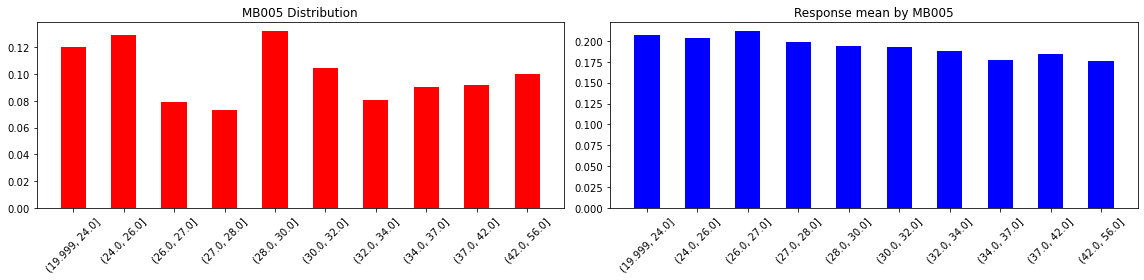

In [135]:
def plot_X_and_Y(var):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    z= data.groupby('AP001_bin')['loan_default'].agg(['count','mean']).reset_index() 
    z['count_pcnt'] = z['count']/z['count'].sum()
    x = z['AP001_bin']
    y_mean = z['mean']
    count_pcnt = z['count_pcnt']
    ind = np.arange(0, len(x))
    width = .5

    fig = plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.bar(ind, count_pcnt, width, color='r')
    #plt.ylabel('X')
    plt.title(var + ' Distribution')
    plt.xticks(ind,x.tolist(), rotation=45)

    plt.subplot(122)
    plt.bar(ind, y_mean, width, color='b')
    #plt.ylabel('Y by X')
    plt.xticks(ind,x.tolist(), rotation=45)
    plt.tight_layout()
    plt.title('Response mean by ' + var)
    plt.show()
    
for i in features_loop:
    plot_X_and_Y(i)  

In [136]:
data.head(3)

,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,...,CD160_bin,CD162_bin,CD164_bin,CD166_bin,CD167_bin,CD169_bin,CD170_bin,CD172_bin,CD173_bin,MB005_bin
0,1,31.0,2.0,1.0,12.0,3.0,3.0,1.0,1.0,1.0,...,"(7.0, 9.0]","(10.0, 13.0]","(11.0, 14.0]","(-0.001, 64.0]","(-0.001, 8.0]","(1098.0, 1498.0]","(1306.0, 1793.0]","(2216.0, 2936.7]","(1930.0, 2606.0]","(6.0, 7.0]"
1,0,27.0,1.0,1.0,12.0,5.0,4.0,0.0,2.0,0.0,...,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData
2,0,33.0,1.0,4.0,12.0,4.0,2.0,0.0,2.0,1.0,...,"(-0.001, 1.0]","(2.0, 5.0]","(1.0, 4.0]","(-0.001, 64.0]","(-0.001, 8.0]","(-0.001, 68.0]","(-0.001, 7.0]","(-0.001, 172.0]","(105.0, 366.0]","(7.0, 9.0]"


After analyzing the response rates and variable distribution, I decided to use the following variables to build model: 
##### features: 
'AP004_bin','AP003_bin','MB005_bin',
'TD009_bin','TD005_bin','TD013_bin','TD006_bin',
'CR009_bin','CR019_bin', 'CR018_bin'
'CD114_bin','CD135_bin','CD071_bin',
'PA022_bin','PA028_bin'
##### target: 
'loan_default'

##### Issue: How to improve ROC?

In [137]:
df = data[['AP004_bin','AP003_bin','MB005_bin', 'TD009_bin','TD005_bin','TD013_bin','TD006_bin', 
           'CR009_bin','CR019_bin', 'CR018_bin','CD114_bin','CD135_bin','CD071_bin', 'PA022_bin',
           'PA028_bin','loan_default']]

In [138]:
df.head(3)

,AP004_bin,AP003_bin,MB005_bin,TD009_bin,TD005_bin,TD013_bin,TD006_bin,CR009_bin,CR019_bin,CR018_bin,CD114_bin,CD135_bin,CD071_bin,PA022_bin,PA028_bin,loan_default
0,"(9.0, 12.0]","(0.999, 3.0]","(6.0, 7.0]","(4.0, 5.0]","(3.0, 4.0]","(10.0, 14.0]","(-0.001, 1.0]","(34000.0, 50000.0]","(0.999, 2.0]","(2.0, 3.0]","(-0.001, 1.0]","(44.0, 66.0]","(-0.001, 3.0]",NoData,NoData,1
1,"(9.0, 12.0]","(0.999, 3.0]",NoData,"(2.0, 3.0]","(2.0, 3.0]","(2.0, 3.0]","(-0.001, 1.0]","(6798.7, 11499.0]","(8.0, 11.0]","(5.0, 7.0]",NoData,NoData,NoData,NoData,NoData,0
2,"(9.0, 12.0]","(3.0, 4.0]","(7.0, 9.0]","(4.0, 5.0]","(3.0, 4.0]","(8.0, 10.0]","(-0.001, 1.0]","(24295.8, 34000.0]","(2.0, 3.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 21.0]","(-0.001, 3.0]",NoData,NoData,0


In [139]:
df = pd.get_dummies(df)

In [166]:
df.columns.values

array(['loan_default', 'AP004_bin_(2.999, 9.0]', 'AP004_bin_(9.0, 12.0]',
       'AP003_bin_(0.999, 3.0]', 'AP003_bin_(3.0, 4.0]',
       'AP003_bin_(4.0, 6.0]', 'MB005_bin_(-0.001, 2.0]',
       'MB005_bin_(11.0, 47.0]', 'MB005_bin_(2.0, 3.0]',
       'MB005_bin_(3.0, 4.0]', 'MB005_bin_(4.0, 5.0]',
       'MB005_bin_(5.0, 6.0]', 'MB005_bin_(6.0, 7.0]',
       'MB005_bin_(7.0, 9.0]', 'MB005_bin_(9.0, 11.0]',
       'MB005_bin_NoData', 'TD009_bin_(-0.001, 1.0]',
       'TD009_bin_(1.0, 2.0]', 'TD009_bin_(11.0, 46.0]',
       'TD009_bin_(2.0, 3.0]', 'TD009_bin_(3.0, 4.0]',
       'TD009_bin_(4.0, 5.0]', 'TD009_bin_(5.0, 7.0]',
       'TD009_bin_(7.0, 8.0]', 'TD009_bin_(8.0, 11.0]',
       'TD005_bin_(-0.001, 1.0]', 'TD005_bin_(1.0, 2.0]',
       'TD005_bin_(2.0, 3.0]', 'TD005_bin_(3.0, 4.0]',
       'TD005_bin_(4.0, 5.0]', 'TD005_bin_(5.0, 7.0]',
       'TD005_bin_(7.0, 24.0]', 'TD013_bin_(-0.001, 2.0]',
       'TD013_bin_(10.0, 14.0]', 'TD013_bin_(14.0, 52.0]',
       'TD013_bin_(2.0, 3

#### Split dataset in features and target variable 

In [141]:
from sklearn.model_selection import train_test_split # Import train_test_split functionfrom sklearn import metrics 
from sklearn.linear_model import LogisticRegression

In [142]:
X = df.loc[:, df.columns != 'loan_default']
y = df.loc[:, df.columns == 'loan_default']

#### Split dataset into training set and test set

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42,stratify = y)

In [144]:
logreg = LogisticRegression()

In [145]:
logreg.fit(X_train,y_train)

/opt/anaconda3/envs/New/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/envs/New/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [146]:
from sklearn import metrics
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.80675


In [159]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
predictions = np.where(y_pred> 0.6,1,0)
print(accuracy_score(y_test,predictions))

0.80675


In [160]:
confusion_matrix(y_test,predictions)

array([[19324,    30],
       [ 4608,    38]])

In [161]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

#y_pred = dtree.predict_proba(X_test[features])[:,1]
roc_auc_value = roc_auc_score(y_test,y_pred)
roc_auc_value

0.5033145058039328

In [162]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
[fpr,tpr]

[array([0.        , 0.00155007, 1.        ]),
 array([0.        , 0.00817908, 1.        ])]

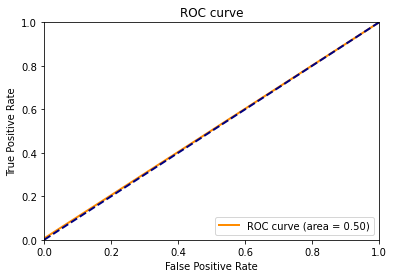

In [163]:
import matplotlib.pyplot as plt
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

### Gains Table

In [164]:
df_prep = pd.DataFrame(columns = ['actual','pred'])

In [172]:
y_test

,loan_default
57285,0
48508,1
1176,1
73032,0
33585,0
...,...
10721,1
65509,0
69688,1
61814,0


In [174]:
df_prep['actual'] = y_test['loan_default']

In [175]:
probs = logreg.predict_proba(X_test)

In [177]:
df_prep['pred'] = probs

In [180]:
df_prep = df_prep.sort_values(by='pred',ascending=False)
df_prep['row_id'] = range(0,0+len(df_prep))
df_prep.head()

,actual,pred,row_id
59890,0,0.987200,0
36346,0,0.986584,1
72356,0,0.985565,2
26482,0,0.985356,3
62125,0,0.984778,4


In [181]:
df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
df_prep.loc[df_prep['decile'] == 10] =9
df_prep['decile'].value_counts()

9    2400
8    2400
7    2400
6    2400
5    2400
4    2400
3    2400
2    2400
1    2400
0    2400
Name: decile, dtype: int64

In [182]:
# Create gains table
gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
gains.columns = ['count','actual']
gains

,count,actual
decile,,
0,2400,145
1,2400,212
2,2400,289
3,2400,351
4,2400,421
5,2400,469
6,2400,523
7,2400,614
8,2400,697


In [183]:
gains['non_actual'] = gains['count'] - gains['actual']
gains['cum_count'] = gains['count'].cumsum()
gains['cum_actual'] = gains['actual'].cumsum()
gains['cum_non_actual'] = gains['non_actual'].cumsum()
gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
gains['if_random'] = np.max(gains['cum_actual']) /10
gains['if_random'] = gains['if_random'].cumsum()
gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,2400,145,2255,2400,145,2255,0.03,0.12,464.6,0.31,9.0,6.04
1,2400,212,2188,4800,357,4443,0.08,0.23,929.2,0.38,15.0,7.44
2,2400,289,2111,7200,646,6554,0.14,0.34,1393.8,0.46,20.0,8.97
3,2400,351,2049,9600,997,8603,0.21,0.44,1858.4,0.54,23.0,10.39
4,2400,421,1979,12000,1418,10582,0.31,0.55,2323.0,0.61,24.0,11.82
5,2400,469,1931,14400,1887,12513,0.41,0.65,2787.6,0.68,24.0,13.10
6,2400,523,1877,16800,2410,14390,0.52,0.74,3252.2,0.74,22.0,14.35
7,2400,614,1786,19200,3024,16176,0.65,0.84,3716.8,0.81,19.0,15.75
8,2400,697,1703,21600,3721,17879,0.80,0.92,4181.4,0.89,12.0,17.23


<AxesSubplot:xlabel='decile'>

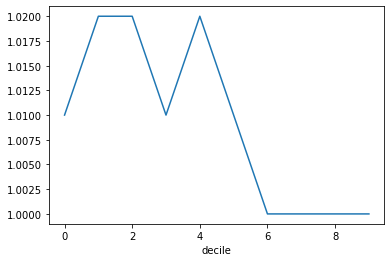

In [187]:
def gains_table(y_test,probs):
    df_prep = pd.DataFrame(columns = ['actual','pred'])
    df_prep['actual'] = y_test['loan_default']
    df_prep['pred'] = probs
    df_prep = df_prep.sort_values(by='pred',ascending=False)
    df_prep['row_id'] = range(0,0+len(df_prep))
    df_prep.head()

    df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
    df_prep.loc[df_prep['decile'] == 10] =9
    df_prep['decile'].value_counts()

    # Create gains table
    gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
    gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
    return(gains)
    
gains = gains_table(y_test,y_pred)
gains
gains['lift'].plot.line()